## Загрузим необходимые библиотеки и данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime


In [2]:
cols = ('day_month_year','data', 'time', 'num_cycle_1st', 'progr_state_1st', 'U_1st', 'I_1st',
                        'num_cycle_2nd', 'progr_state_2nd', 'U_2nd', 'I_2nd',
                        'num_cycle_3rd', 'progr_state_3rd', 'U_3rd', 'I_3rd')
df = pd.read_csv('data/1-20-0.5-5.csv', sep=';', skiprows=[0,1,2], names=cols)


In [3]:
df.head()

,day_month_year,data,time,num_cycle_1st,progr_state_1st,U_1st,I_1st,num_cycle_2nd,progr_state_2nd,U_2nd,I_2nd,num_cycle_3rd,progr_state_3rd,U_3rd,I_3rd
0,19.11.21,19:05:32,1.0,6.0,1023.0,-20.0,1.0,6.0,1023.0,-20.0,1.0,6.0,1023.0,-20.0,NaN
1,19.11.21,19:05:33,1.0,6.0,658.0,-20.0,1.0,6.0,657.0,-20.0,1.0,5.0,49.0,0.0,NaN
2,19.11.21,19:05:34,1.0,6.0,658.0,-20.0,1.0,6.0,656.0,-20.0,1.0,5.0,679.0,0.0,NaN
3,19.11.21,19:05:35,1.0,6.0,657.0,-20.0,1.0,6.0,655.0,-20.0,1.0,5.0,679.0,0.0,NaN
4,19.11.21,19:05:36,1.0,6.0,657.0,-20.0,1.0,6.0,655.0,-20.0,1.0,5.0,680.0,0.0,NaN


In [4]:
df.isnull().sum(axis=0)

day_month_year           0
data                     0
time                     2
num_cycle_1st            1
progr_state_1st          1
U_1st                    1
I_1st                    1
num_cycle_2nd            1
progr_state_2nd          2
U_2nd                    2
I_2nd                    2
num_cycle_3rd            2
progr_state_3rd       3442
U_3rd                 3442
I_3rd              2849260
dtype: int64

Переведем data в секунды, где началом отчета будет первая строка t=0

In [5]:
def date_join(df):
    for spliter, new_cols, old_cols in zip(['.', ':'], 
                                           [['day', 'month', 'year'], ['hour', 'minute', 'second']], 
                                           ['day_month_year', 'data']):

        new_date = pd.DataFrame(list(df[old_cols].apply(lambda a: (map(int, a.split(spliter))))))
        df[new_cols] = new_date
        df.drop(columns=old_cols, inplace=True)
    return df

In [6]:
def create_relative_time_in_seconds(df):
    columns = np.array(df[['day', 'hour', 'minute', 'second']])
    rel_time = np.dot(columns, np.array([24*60*60, 3600, 60, 1]))
    rel_time -= rel_time[0]
    return rel_time
    

In [7]:
def get_resistance(U, I):
    return U / I

In [58]:
def get_power(U, I):
    return U * I

In [61]:
def get_power_and_resistance(df):
    for columns in [df.iloc[:, 3+i:5+i].columns for i in range(0, 10, 4)]:
        U, I = df[columns[0]], df[columns[1]]
        for func, name in zip([get_resistance, get_power], ['P', 'R']):
            df['_'.join([name, columns[0].split('_')[-1]])] = func(U, I)
    return df

In [62]:
def get_new_features(df):
    df['rev_time'] = create_relative_time_in_seconds(df)
    df = get_power_and_resistance(df)
    
    return df

Index(['time', 'num_cycle_1st', 'progr_state_1st', 'U_1st', 'I_1st',
       'num_cycle_2nd', 'progr_state_2nd', 'U_2nd', 'I_2nd', 'num_cycle_3rd',
       'progr_state_3rd', 'U_3rd', 'I_3rd', 'day', 'month', 'year', 'hour',
       'minute', 'second', 'rev_time', 'R_1st', 'R_2nd', 'R_3rd', 'P_1st',
       'P_2nd', 'P_3rd'],
      dtype='object')


In [10]:
df = date_join(df)

df = get_new_features(df)
cols = df.columns

In [46]:
for i in range(0, 10, 4):
    print(df.iloc[:, 3+i:5+i].columns)

Index(['U_1st', 'I_1st'], dtype='object')
Index(['U_2nd', 'I_2nd'], dtype='object')
Index(['U_3rd', 'I_3rd'], dtype='object')


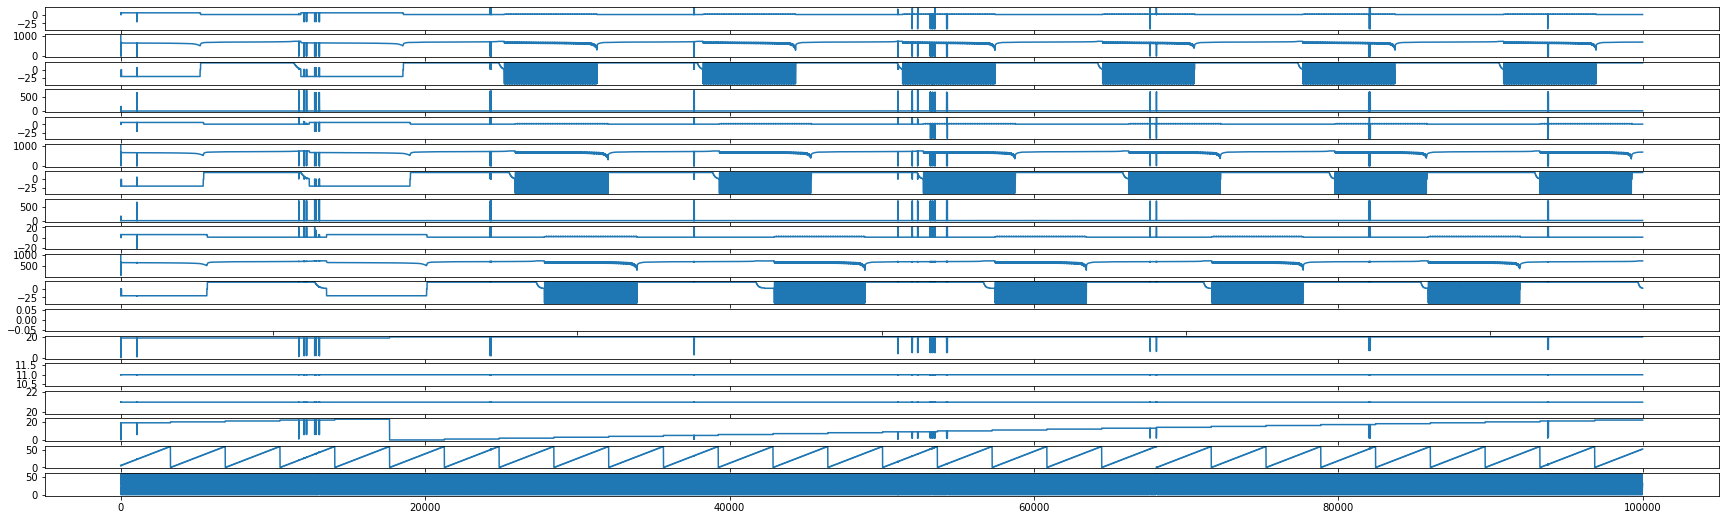

In [12]:
fig = plt.figure(figsize=(30, 10))
num_cols = len(cols)
for index, col in enumerate(cols[1:-1], 1):
    fig.add_subplot(num_cols,1, index)
    plt.plot(np.arange(len(df[col]))[:100000], df[col][:100000])

In [13]:
len(cols)

20